# MNIST

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml("mnist_784", as_frame=False)

C:\Python311\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [4]:
X, y = mnist["data"], mnist["target"]

In [5]:
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

In [7]:
import matplotlib
import matplotlib.pylab as plt

In [8]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)

(-0.5, 27.5, 27.5, -0.5)

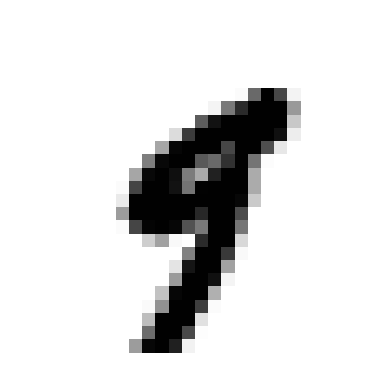

In [9]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")

In [10]:
y[36000]

'9'

In [11]:
# spliting data into test set and training set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [12]:
import numpy as np

In [13]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# Training a Binary Classifier

In [14]:
y_train = y_train.astype(np.int8)

In [15]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [16]:
from sklearn.linear_model import SGDClassifier

In [17]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [18]:
sgd_clf.predict([some_digit])

array([False])

# Measuring Accuracy Using Cross-Validation

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9473, 0.9658, 0.9504])

*The accuracy is over 95% its good.*

In [21]:
from sklearn.base import BaseEstimator

In [22]:
# trying another classifier
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass

    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [23]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91025, 0.90845, 0.91025])

*The predicions was above 90%.*

# Confusion Matrix

In [24]:
from sklearn.model_selection import cross_val_predict

In [25]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [26]:
y_train_pred

array([False, False,  True, ..., False, False, False])

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
confusion_matrix(y_train_5, y_train_pred)

array([[53276,  1303],
       [ 1427,  3994]], dtype=int64)

# Precison and Recall

In [29]:
from sklearn.metrics import precision_score, recall_score

In [30]:
precision_score(y_train_5, y_train_pred)

0.7540117047385313

In [31]:
recall_score(y_train_5, y_train_pred)

0.7367644346061613

In [32]:
from sklearn.metrics import f1_score

In [33]:
f1_score(y_train_5, y_train_pred)

0.7452883000559807

In [34]:
y_scores = sgd_clf.decision_function([some_digit])

In [35]:
y_scores

array([-4798.37188886])

In [36]:
threshold = 0

In [37]:
y_some_digit_pred = (y_scores > threshold)

In [38]:
y_some_digit_pred

array([False])

In [39]:
threshold = 200000

In [40]:
y_some_digit_pred = (y_scores > threshold)

In [41]:
y_some_digit_pred

array([False])

In [42]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [43]:
y_scores

array([ -2156.48328361,  -3829.26201161,   3436.27342964, ...,
        -9549.2475699 ,  -6206.23501827, -22083.75507412])

In [44]:
from sklearn.metrics import precision_recall_curve

In [45]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [46]:
precisions

array([0.09035   , 0.09035151, 0.09035301, ..., 1.        , 1.        ,
       1.        ])

In [47]:
recalls

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       3.68935621e-04, 1.84467810e-04, 0.00000000e+00])

In [48]:
thresholds

array([-131091.34568361, -126276.15222961, -122603.64197343, ...,
         33766.58649087,   34548.80633554,   39265.1459129 ])

In [49]:
# plotting precison and recall as functions of the threshold
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[: -1], "b--", label="Precision")
    plt.plot(thresholds, recalls[: -1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

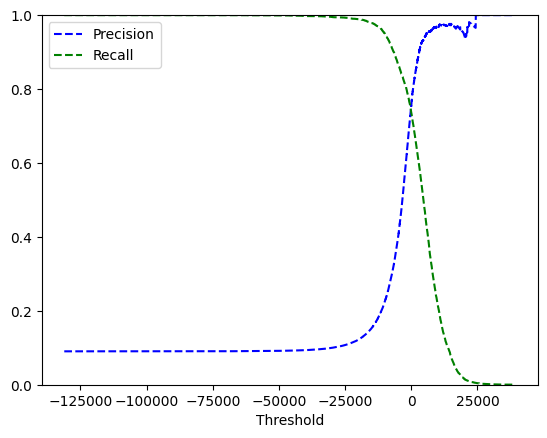

In [50]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [51]:
y_train_pred_90 = (y_scores > 70000)

In [52]:
precision_score(y_train_5, y_train_pred_90, average='weighted', labels=np.unique(y_train_pred_90))

0.90965

# The ROC Curve

In [53]:
from sklearn.metrics import roc_curve

In [54]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [55]:
fpr

array([0.        , 0.        , 0.        , ..., 0.99904725, 0.99904725,
       1.        ])

In [56]:
tpr

array([0.00000000e+00, 1.84467810e-04, 5.16509869e-03, ...,
       9.99815532e-01, 1.00000000e+00, 1.00000000e+00])

In [57]:
thresholds

array([  39266.1459129 ,   39265.1459129 ,   24400.15452823, ...,
        -86756.42569942,  -86872.10092696, -131091.34568361])

In [58]:
# function to plot FPR against TPR
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

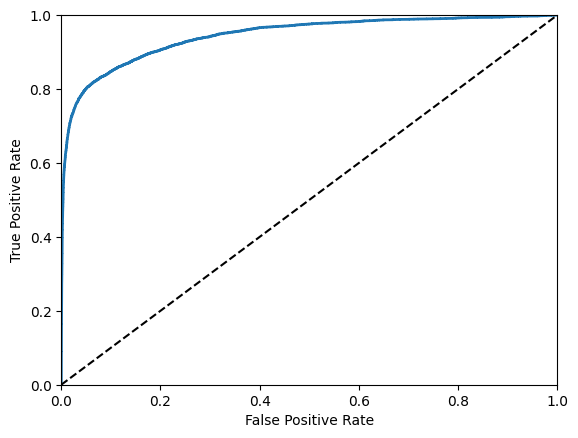

In [59]:
plot_roc_curve(fpr, tpr)

In [60]:
from sklearn.metrics import roc_auc_score

In [61]:
# ROC AUC area
roc_auc_score(y_train_5, y_scores)

0.9441596818313376

*Using the "RandomForestClassifier" class.*

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

*To plot the ROC curve, we need scores but "RandomForestClassifier" returns the probablities. Use the below solution to use positive class's probability as the score.*

In [64]:
y_probas_forest

array([[0.97, 0.03],
       [0.98, 0.02],
       [0.89, 0.11],
       ...,
       [0.16, 0.84],
       [0.51, 0.49],
       [0.96, 0.04]])

In [65]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forst, thresholds_forst = roc_curve(y_train_5, y_scores_forest)

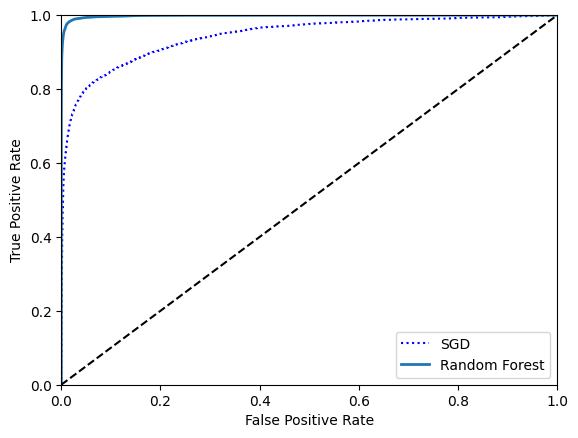

In [66]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forst, "Random Forest")
plt.legend(loc="lower right")

In [67]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983431931967756

In [68]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [69]:
sgd_clf.predict([some_digit])

array([9], dtype=int8)

In [70]:
some_digit_scores = sgd_clf.decision_function([some_digit])

In [71]:
some_digit_scores

array([[-39596.65130986, -17979.84664092, -22094.18027601,
          -980.69372902,   -670.87425189,  -4970.84972252,
        -30915.75793248,  -8728.82057773,  -1582.54727778,
          -207.63476686]])

In [72]:
np.argmax(some_digit_scores)

9

In [73]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [74]:
sgd_clf.classes_[5]

5

*Example of "One Vs One" classifier*

In [75]:
from sklearn.multiclass import OneVsOneClassifier

In [76]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))

In [77]:
ovo_clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=SGDClassifier(random_state=42))

In [78]:
ovo_clf.predict([some_digit])

array([4], dtype=int8)

In [79]:
len(ovo_clf.estimators_)

45

In [80]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [81]:
forest_clf.predict([some_digit])

array([9], dtype=int8)

In [82]:
forest_clf.predict_proba([some_digit])

array([[0.  , 0.01, 0.  , 0.01, 0.09, 0.01, 0.  , 0.04, 0.02, 0.82]])

In [83]:
np.max(forest_clf.predict_proba([some_digit]))

0.82

In [84]:
np.min(forest_clf.predict_proba([some_digit]))

0.0

In [85]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.8801, 0.841 , 0.8857])

*The accuracy for all folds is above 83%. Which is good enough. Now scaling the inputs.*

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
scaler = StandardScaler()

In [88]:
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [89]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.90215, 0.9016 , 0.89815])

# Error Analysis

In [90]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

In [91]:
conf_mx = confusion_matrix(y_train, y_train_pred)

In [92]:
conf_mx

array([[5592,    0,   20,    8,    8,   45,   32,    6,  211,    1],
       [   0, 6420,   41,   24,    3,   43,    4,    7,  189,   11],
       [  24,   26, 5256,   88,   72,   22,   71,   39,  348,   12],
       [  26,   22,  127, 5217,    1,  219,   24,   46,  379,   70],
       [  11,   13,   49,   11, 5246,    7,   31,   16,  293,  165],
       [  26,   19,   32,  155,   49, 4495,   74,   18,  491,   62],
       [  29,   18,   62,    2,   42,   88, 5548,    5,  124,    0],
       [  18,   12,   61,   27,   51,   12,    4, 5703,  164,  213],
       [  15,   67,   45,   97,    3,  123,   32,    8, 5414,   47],
       [  22,   23,   29,   61,  124,   38,    1,  178,  326, 5147]],
      dtype=int64)

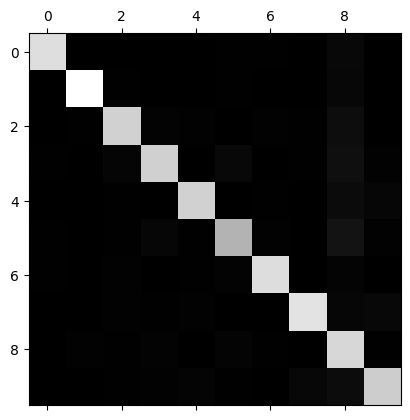

In [93]:
plt.matshow(conf_mx, cmap=plt.cm.gray)

In [94]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

In [95]:
norm_conf_mx

array([[9.44116157e-01, 0.00000000e+00, 3.37666723e-03, 1.35066689e-03,
        1.35066689e-03, 7.59750127e-03, 5.40266757e-03, 1.01300017e-03,
        3.56238393e-02, 1.68833361e-04],
       [0.00000000e+00, 9.52239691e-01, 6.08128152e-03, 3.55977455e-03,
        4.44971818e-04, 6.37792940e-03, 5.93295758e-04, 1.03826758e-03,
        2.80332246e-02, 1.63156333e-03],
       [4.02819738e-03, 4.36388050e-03, 8.82175227e-01, 1.47700571e-02,
        1.20845921e-02, 3.69251427e-03, 1.19167506e-02, 6.54582075e-03,
        5.84088620e-02, 2.01409869e-03],
       [4.24074376e-03, 3.58832164e-03, 2.07144022e-02, 8.50921546e-01,
        1.63105529e-04, 3.57201109e-02, 3.91453270e-03, 7.50285435e-03,
        6.18169956e-02, 1.14173870e-02],
       [1.88291681e-03, 2.22526532e-03, 8.38753851e-03, 1.88291681e-03,
        8.97980144e-01, 1.19821979e-03, 5.30640192e-03, 2.73878809e-03,
        5.01540568e-02, 2.82437521e-02],
       [4.79616307e-03, 3.50488840e-03, 5.90296993e-03, 2.85925106e-02,
   

*Filling the diagonals with zeros to keep onlt the errors.*

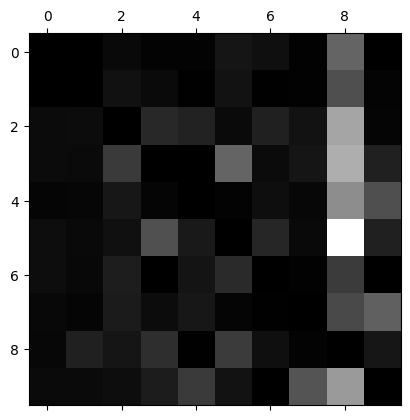

In [96]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

*Rows represents actual classes and columns represent predicted classes.*

*Plotting the examples of 3's and 5's.*

In [97]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

In [98]:
cl_a, cl_b = 3, 5
X_aa  =X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab  =X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba  =X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb  =X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

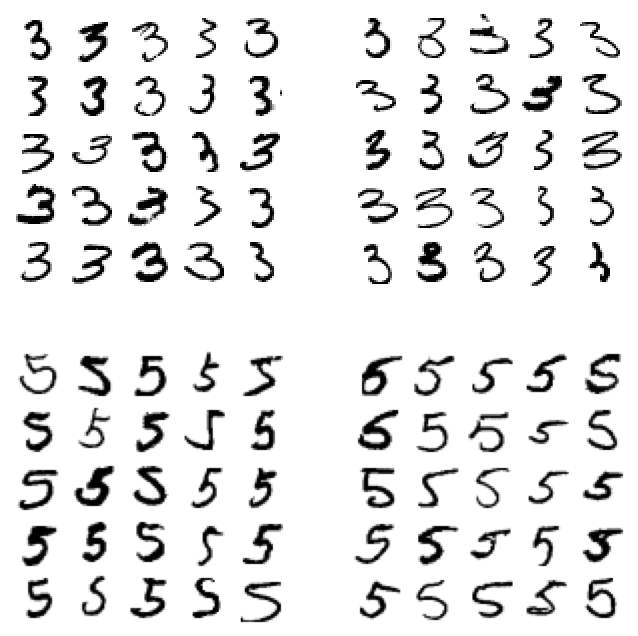

In [99]:
plt.figure(figsize=(8, 8))
plt.subplot(221)
plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222)
plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223)
plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224)
plot_digits(X_bb[:25], images_per_row=5)

# Multilabel Classification

In [100]:
from sklearn.neighbors import KNeighborsClassifier

In [101]:
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [102]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [103]:
knn_clf.predict([some_digit])

array([[ True,  True]])

In [104]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)

In [105]:
f1_score(y_train, y_train_knn_pred, average="macro")

0.9683101180604607

# Multioutput Classification

In [110]:
train_noise = np.random.randint(0, 100, (len(X_train), 784))
test_noise = np.random.randint(0, 100, (len(X_test), 784))
X_train_mod = X_train + train_noise
X_test_mod = X_test + test_noise
y_train_mod = X_train
y_test_mod = X_test

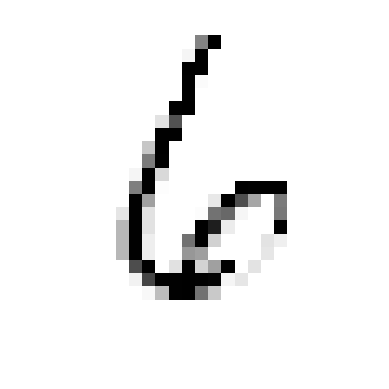

In [117]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[3036]])
plot_digits(clean_digit)